# Interpolacje


### Definicja
Dana jest funkcja y=f(x) określona i ciągła na danym przedziale [a,b], która przyjmuje wartosci $y_{1}$,$y_{2}$,....,$y_{n}$ dla skończonego zbioru argumentów $x_{1}$,$x_{2}$,...,$x_{n}$, czyli $y_{i}$=f($x_{i}$) dla i=1,...,n <br>
Zbiór argumentów {$x_{i}$} nazywamy *węzłami interpolacji*, przy czym zakłada się, że a $\leq$ $x_{1}$,$x_{2}$,...,$x_{n}$ $\leq$ b
<br> Sama interpolacja polega na znalezieniu innej 'przybliżonej' funkcji w danym przedziale, która w węzłach interpolacji przyjmuje te same wartości co oryginalna funkcja. Inaczej mówiąc, polega na wyznaczeniu przybliżonych wartości funkcji w punktach, które węzłami nie są, oraz na oszacowaniu błędu przybliżenia. Funkcję oryginalną nazywamy *funkcją interpolowaną*, a funkcję szukaną-*funkcją interpolującą*

Nie wchodząc w szczególy dotyczące kodu,dla zobrazowania definicji, poniższy przykład obrazuje dwa różne sposoby interpolacji:

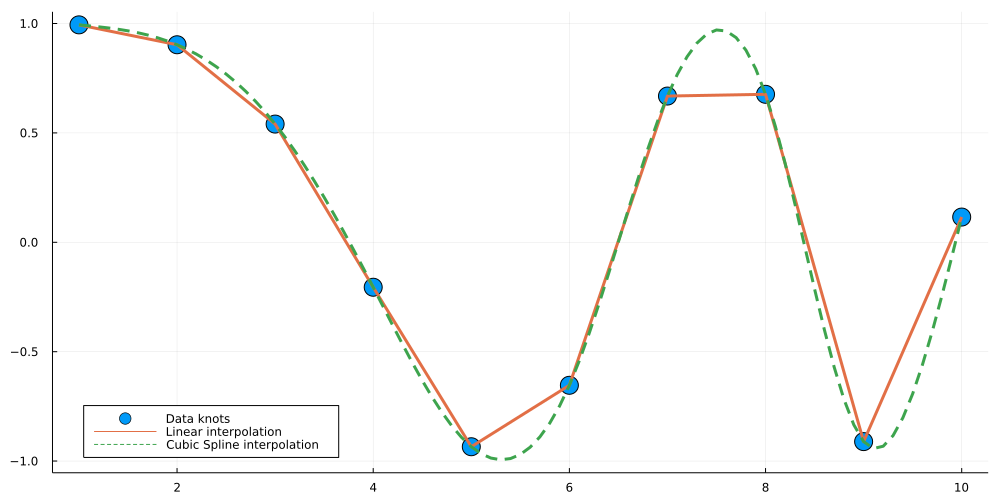

In [1]:
using Interpolations, Plots

# Lower and higher bound of interval
a = 1.0
b = 10.0
# Interval details
x = a:1.0:b
# This can be any sort of array data, as long as
# length(x) == length(y)
y = @. cos(x^2 / 9.0) # Function application by broadcasting
# Interpolations
itp_linear = LinearInterpolation(x, y)
itp_cubic = CubicSplineInterpolation(x, y)
# Interpolation functions
f_linear(x) = itp_linear(x)
f_cubic(x) = itp_cubic(x)
# Plots
width, height = 1000, 500 
x_new = a:0.1:b # smoother interval, necessary for cubic spline

scatter(x, y, markersize=10,label="Data knots")
plot!(f_linear, x_new, w=3,label="Linear interpolation")
plot!(f_cubic, x_new, linestyle=:dash, w=3, label="Cubic Spline interpolation")
plot!(size = (width, height))
plot!(legend = :bottomleft)

## Rodzaje interpolacji
Interpolacje można podzielić na wiele rodzajów. Najbardziej popularne to:<br><br>
Interpolacje liniowe:
  - wielomianowa
    - metoda Lagrange'a
    - wzór interpolacyjny Newtona(liniowa, kwadratowa, sześcienna)
    - wzór Neville'a
    - metoda Hermite'a
    - metoda Czebyszewa
  - trygonometryczna
  - funkcje sklejane

Interpolacje nieliniowe:
  - wymierna
  - wykładniczna


Warto wspomnieć, że Julia oferuje kilka bibliotek dotyczących interpolacji, przykładowo: BasicInterpolators, Interpolations, GridInterpolations, DataInterpolations. Zawierają większość z podstawowych metod interpolacji i będą przez nas wykorzystywane w dalszej części projektu, gdzie przyjrzymy się bliżej kilku wybranym metodom. 

### Interpolacja liniowa
Jedna z najprostszych metod interpolacyjnych przy użyciu wielomianu stopnia pierwszego czyli funkcji liniowej. Ponieważ funkcja liniowa jest jednoznacznie określona przez dwa punkty, więc interpolację należy przeprowadzić dla każdej pary kolejnych punktów z przedziału [a,b]. 
Stosując następujacy zapis:
f(x)=$b_{0}$+$b_{1}$(x-$x_{i}$) 
dla znanych punktów możemy zapisać<br>
f(x=$x_{i}$)=$b_{0}$+$b_{1}$($x_{i}$-$x_{i}$) <br>
f($x_{i}$)=$b_{0}$<br>
oraz<br>
f(x=$x_{i+1}$)=$b_{0}$+$b_{1}$($x_{i+1}$-$x_{i}$) <br>
f(x=$x_{i+1}$)=f($x_{i}$)+$b_{1}$($x_{i+1}$-$x_{i}$) <br>
Mamy więc:<br>
$b_{1}$=f(x=$x_{i+1}$)-f(x=$x_{i}$)/$x_{i+1}$-$x_{i}$<br>
Zatem wartość funkcji interpolującej można obliczyć ze wzoru:<br>
f(x)=f($x_{i}$)+(f(x=$x_{i+1}$)-f(x=$x_{i}$)/$x_{i+1}$-$x_{i}$)*(x-$x_{i}$)

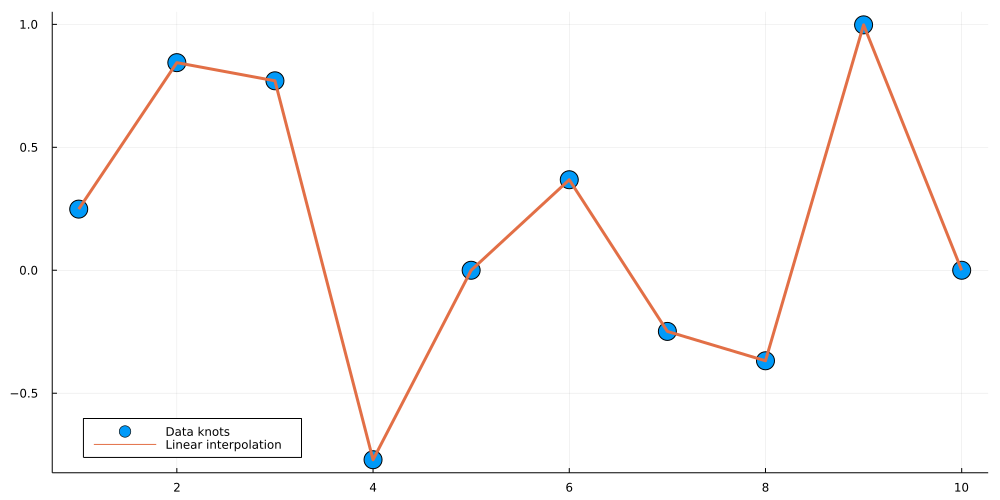

In [2]:
using Interpolations, Plots

a = 1.0
b = 10.0
x = a:1.0:b

y =@. sin(2pi*x^2/25) # Function application by broadcasting

itp_linear = LinearInterpolation(x, y)
f_linear(x) = itp_linear(x)
width, height = 1000, 500 

scatter(x, y, markersize=10,label="Data knots")
plot!(f_linear, x_new, w=3,label="Linear interpolation")
plot!(size = (width, height))
plot!(legend = :bottomleft)

### Interpolacja wielomianowa Lagrange'a

Interpolacja Lagrange'a jest metodą numeryczną polegającą na przybliżaniu funkcji, w której znane jest nam $ n+1 $ punktów wielomianem stopnia $ n $ przechodzacym przez te punkty.

Mając $n+1$ punktów $(x_i , y_i)$  wielomian Lagrange'a przyjmuje postać:

$$ L(x) = \sum_{i=0}^ny_i \cdot \prod_{j=0 \; \land\ j \neq i}^n\frac{x-x_j}{x_i-x_j} $$



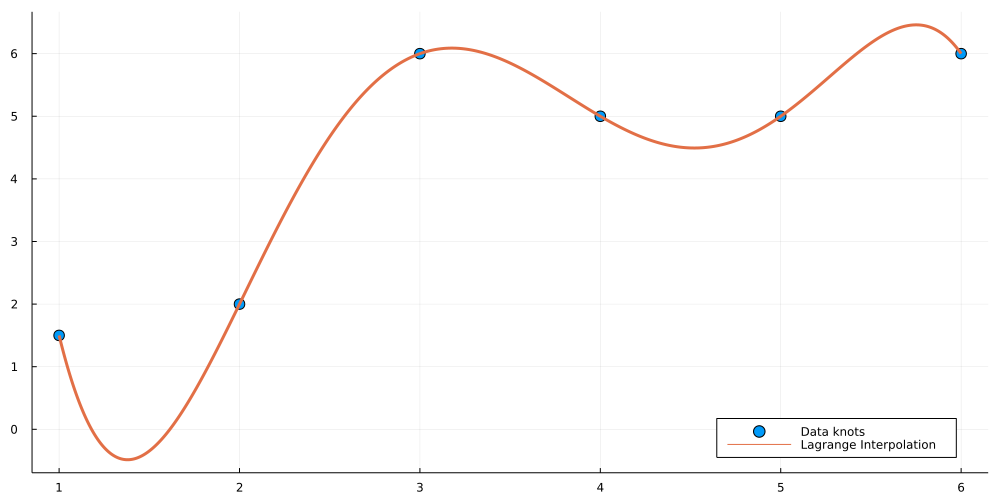

In [8]:
using DataInterpolations, Plots
xs = [  1, 2, 3, 4, 5, 6]
ys = [1.5, 2, 6, 5, 5, 6]

A = LagrangeInterpolation(ys, xs)
scatter(xs, ys, label="Data knots", markersize=6)
plot!(A, w=3, label = "Lagrange Interpolation")
plot!(legend = :bottomright, size=(800,400))

### Efekt Rungego

Zjawisko zwane **Efektem Rungego** polega na pogorszaniu się jakości interpolacji wielomianowej, mimo zwiększania ilości jej węzłów.

Przykład tego zjawiska najlepiej widać na funkcji Rungego danej wzorem $$ f(x) = \frac{1}{1+25x^2} $$ na przedziale $ [-1,1] $.

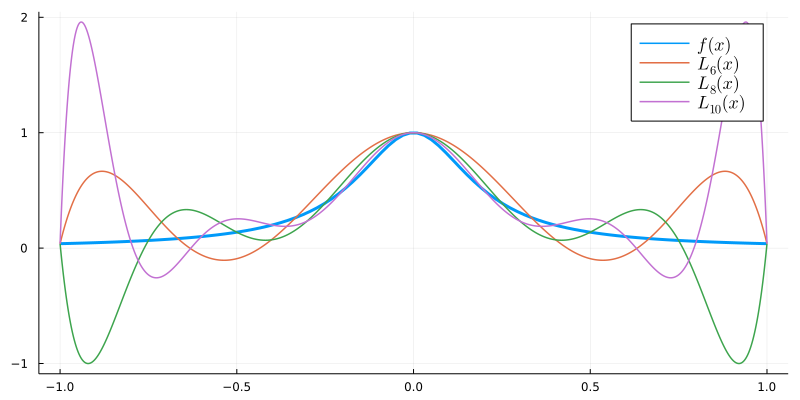

In [4]:
Runge(x) = 1/(1+25*x^2)

Xs = LinRange(-1,1,100)
Ys = Runge.(Xs)
plot(Xs, Ys, w=3, label="\$f(x)\$")

xs = LinRange(-1,1,7)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_6(x)\$")

xs = LinRange(-1,1,9)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_8(x)\$")

xs = LinRange(-1,1,11)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_{10}(x)\$")


plot!(size=(800,400))
plot!(legendfontsize=12)

### Węzły Czebyszewa

By uniknąć efektu Rungego przy interpolacji wielomianowej często zamiast równoodleglych węzłów korzysta się z tzn. **Węzłów Czebyszewa**, będącymi pierwiastkami wielomianu Czebyszewa.

Chcąc otrzymać $ n $ węzłów Czebyszewa w przedziale $(-1,1)$ korzystamy ze wzoru

$$ x_k = \cos\left(\frac{2k-1}{2n}\pi\right),\; k = 1,\dots,n $$

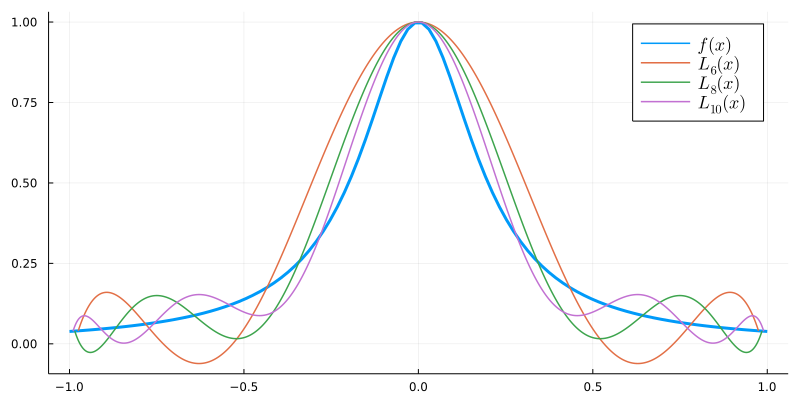

In [5]:
function xCzeb(n)
    k = 1:n
    return @. cos((2*k-1)/(2*n)*π)
end

Xs = LinRange(-1,1,100)
Ys = Runge.(Xs)
plot(Xs, Ys, w=3, label="\$f(x)\$")

xs = xCzeb(7)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_6(x)\$")

xs = xCzeb(9)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_8(x)\$")

xs = xCzeb(11)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_{10}(x)\$")

plot!(size=(800,400))
plot!(legendfontsize=12)

### Interpolacja funkcjami sklejanymi

Metoda ta polega na przybliżaniu nieznanej funkcji wielomianami niskiego stopnia.

Mając $n+1$ punktów $(x_i , y_i)$ z przedziału $ [a, b] $ dla każdych dwóch kolejnych tworzy się osobny przedział i w każdym z nich interpoluje się funkcję wielomianem interpolacyjnym stopnia $m$ (najczęśniej niskiego stopnia), takim by po połączeniu tych wielomianów funkcja sklejona $S(x)$ spełniała $ S(x) \in C^{m-1} $.



Interpolacja funkcjami sklejanymi jest często preferowana w stosunku do interpolacji wielomianowej, ponieważ pozwala uniknąć problemu **Efektu Rungego**, w którym oscylacja może wystąpić między punktami podczas interpolacji przy użyciu wielomianów wysokiego stopnia.

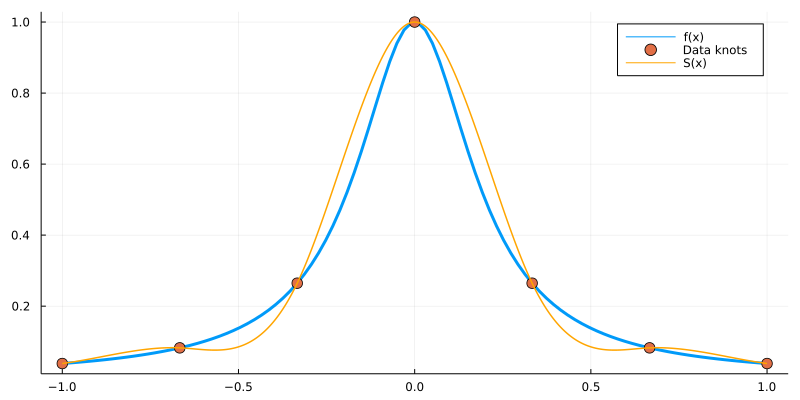

In [9]:
Runge(x) = 1/(1+25*x^2)

Xs = LinRange(-1,1,100)
Ys = Runge.(Xs)
plot(Xs, Ys, w=3, label="f(x)")

xs = LinRange(-1,1,7)
ys = Runge.(xs)
A = CubicSpline(ys, xs)
scatter!(xs,ys,label="Data knots", markersize=6)
plot!(A, w=1.5, label="S(x)", c=:orange)

plot!(size=(800,400))

### Interpolacja trygonometryczna